In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [2]:
# MESH VARIABLES
xgrid = 100
ygrid = 100
zgrid = 200

In [3]:
def create_mesh_grid():
    xmax = xgrid - 1
    ymax = ygrid - 1
    zmax = zgrid - 1
    x, y, z = np.mgrid[0:1:(xmax*1j), 0:1:(ymax*1j), 0:1:(zmax*1j)]

    return x, y, z

In [4]:
def gauss3d_o3_profile():
    x, y, z = create_mesh_grid()
    # Need an (N, 2) array of (x, y) pairs.
    xyz = np.column_stack([x.flat, y.flat, z.flat])

    mu = np.array([.5, .5, 0])

    sigma = np.array([.25, .25, .15])
    covariance = np.diag(sigma**2)

    val = multivariate_normal.pdf(xyz, mean=mu, cov=covariance)

    # Reshape back to a (30, 30) grid.
    val = val.reshape(x.shape)

    # Normalize max to 100 (ppmv) and transpose so orientation is correct (z up)
    val = val.T*(100/val.max())

    # Assign minimum value via ambient concentration populated in array by WRF-Chem
    # prior to modification
    val[val<0.03] = 0.03

    print(val.shape)

    new_o3_vals = np.ma.array(np.array([val]), mask=False, dtype='float32')

    return new_o3_vals

In [19]:
def checkerboard_profile(fx, fy, xgrid, ygrid, zgrid, max_val, min_val, phase_shift=False):
    xrange, yrange = xgrid, ygrid

    if (fx == fy) and (fx == 0):
        epsilon = 0.0
    else:
        epsilon = 0.001
    Ax, Ay = 1, 1
    
    #print(f'\nUsing fx={fx} and fy={fy}\n')
    k = fx*2*np.pi/xrange #wavenumber 2pi / L
    m = fy*2*np.pi/yrange
    x=np.arange(xrange)
    y=np.arange(yrange)
    X,Y=np.meshgrid(x,y)
    phi=Ax*np.sin(k*X+epsilon)*Ay*np.sin(m*Y+epsilon)

    phi_star = phi.copy()

    phi_star[phi_star > 0] = max_val
    phi_star[phi_star <= 0] = min_val

    if phase_shift:
        if (fx == fy) or (fx<fy):
            axis= 0
        else:
            axis = 1
        phi_star = np.flip(phi_star, axis=axis)

    mesh = np.zeros((xgrid, ygrid, zgrid))
    mesh[:, :, 0] = phi_star

    # transpose so z, y, x
    mesh = mesh.T

    mesh = np.ma.array(np.array([mesh]), mask=False, dtype='float32')

    return mesh


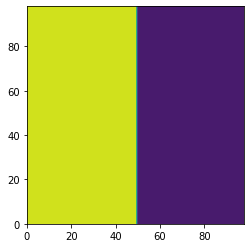

In [22]:
# MESH VARIABLES
xgrid = 99
ygrid = 99
zgrid = 1
max_val = 100
min_val = 0

fx = 0
fy = 1

profile = checkerboard_profile(fx, fy, xgrid, ygrid, zgrid, max_val, min_val)
plt.contourf(profile[0].data[0])
plt.gca().set_aspect('equal')

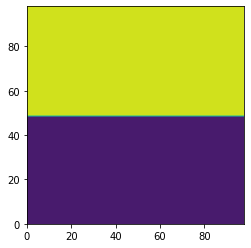

In [6]:
# MESH VARIABLES
xgrid = 99
ygrid = 99
zgrid = 1
max_val = 100
min_val = 0

fx = 1
fy = 0

profile = checkerboard_profile(fx, fy, xgrid, ygrid, zgrid, max_val, min_val, phase_shift=True)
#profile = profile.T
plt.contourf(profile[0].data[0])
plt.gca().set_aspect('equal')

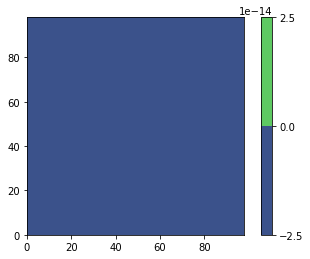

In [23]:
# MESH VARIABLES
xgrid = 99
ygrid = 99
zgrid = 1
max_val = 100
min_val = 0

fx = 0
fy = 0

profile = checkerboard_profile(fx, fy, xgrid, ygrid, zgrid, max_val, min_val, phase_shift=True)
#profile = profile.T
c = plt.contourf(profile[0].data[0])
plt.gca().set_aspect('equal')
plt.colorbar()

In [24]:
profile.data[0].min()

0.0